In [232]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.cluster import MeanShift, estimate_bandwidth


In [446]:
import scipy.stats as stats
def show_normal_qq(resid):
    stats.probplot(resid, dist="norm", plot=plt)
    plt.title("Normal Q-Q plot")
    plt.show()

In [583]:
movie_df = pickle.load(open('processed_movie_df.pickle', 'rb'))
#movie_df = movie_df.drop('Paranormal Activity')
#movie_df = movie_df[movie_df.release.apply(lambda x: x.year>2009)]

In [584]:
columns_to_drop=['link_stub', 'release','desc', 'distr', 'opening', 'runtime',
       'genres', 'gross_dom', 'gross_inter', 'gross_world',
       'Director', 'Writer', 'Producer', 'Composer', 'Cinematographer',
       'Editor', 'Production Designer', 'Actors', 'roi']

In [585]:
X = movie_df.drop(columns=columns_to_drop)
y = movie_df.gross_dom

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [249]:
"""scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)"""

In [472]:
lr = LinearRegression(fit_intercept=False)
lr.fit(X_train, y_train)

y_preds = lr.predict(X_test)

#Much Better!
lr.score(X_train, y_train)

0.1118060050444567

Train Score: 0.872
Test Score: 0.850
MAE: 18389479.085
MSE: 1086814239959564.000
RMSE: 32966865.789


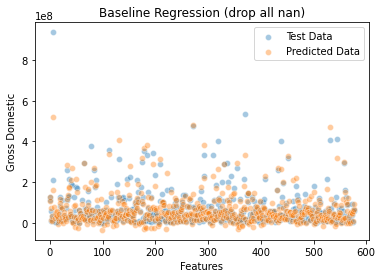

In [586]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

lr = LinearRegression(fit_intercept=False)
lr.fit(X_train, y_train)

y_preds = lr.predict(X_test)

#sns.scatterplot(data=y_train, alpha=0.1, label='Train Data')
sns.scatterplot(data=y_test.values, alpha=0.4, label='Test Data')
sns.scatterplot(data=y_preds, alpha=0.4, label='Predicted Data')
plt.ylabel('Gross Domestic')
plt.xlabel('Features')
plt.title('Baseline Regression (drop all nan)')
plt.legend();
print('Train Score: {:.3f}'.format(lr.score(X_train, y_train)))
print('Test Score: {:.3f}'.format(lr.score(X_test, y_test)))
print('MAE: {:.3f}'.format(metrics.mean_absolute_error(y_test, y_preds)))
print('MSE: {:.3f}'.format(metrics.mean_squared_error(y_test, y_preds)))

print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_preds))))

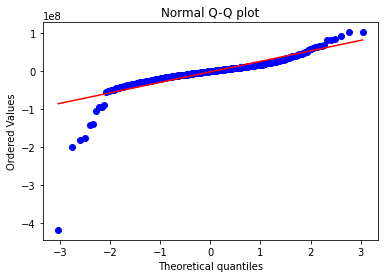

In [587]:
residuals = y_preds - y_test
show_normal_qq(residuals)

In [496]:
y_preds.mean()

0.24312766796823665

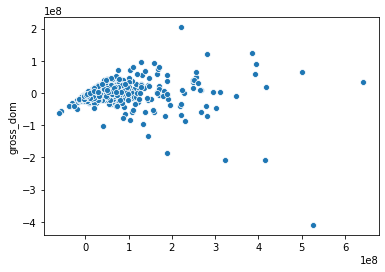

In [426]:
sns.scatterplot(x=y_preds, y=residuals)

In [556]:
def Kfold_LR(X,y,n, rs):
    scoring_metrics = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error', 'r2']
    lr = LinearRegression()
    kf = KFold(n_splits=n, shuffle=True, random_state=rs)
    return pd.DataFrame(cross_validate(lr, X, y, cv=kf, scoring=scoring_metrics, return_train_score=True))

In [582]:
Kfold_LR(X, y , 5, None)

,fit_time,score_time,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error,test_r2,train_r2
0,0.006656,0.003903,-3.048299e+07,-2.748556e+07,-2.609598e+15,-1.935278e+15,-5.108423e+07,-4.399179e+07,0.641320,0.688917
1,0.006136,0.003338,-2.816078e+07,-2.799500e+07,-1.974299e+15,-2.089274e+15,-4.443308e+07,-4.570858e+07,0.649556,0.685029
2,0.006244,0.003939,-2.896404e+07,-2.765861e+07,-2.523993e+15,-1.948330e+15,-5.023936e+07,-4.413989e+07,0.655199,0.686305
3,0.005542,0.003749,-2.867426e+07,-2.766650e+07,-1.957841e+15,-2.093740e+15,-4.424749e+07,-4.575741e+07,0.704247,0.672182
4,0.004898,0.003278,-2.650840e+07,-2.845937e+07,-1.661395e+15,-2.165978e+15,-4.076022e+07,-4.654007e+07,0.686297,0.677393


Linear Regression with MeanShift Grouping

/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

Train Score: 0.865
Test Score: 0.849
MAE: 18152385.772
MSE: 778671217780097.250
RMSE: 27904680.930


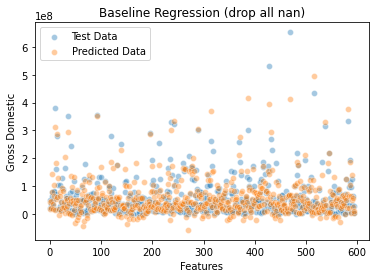

In [302]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

columns_to_cluster = ['day_of_year', 'budget', 'theaters', 'holiday_distance']
X_tr_cluster = X_train[columns_to_cluster]
X_tst_cluster = X_test[columns_to_cluster]

bandwidth = estimate_bandwidth(X_tr_cluster, quantile=0.2)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_tr_cluster)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

X_train.loc[:,'labels'] = labels.reshape(-1,1)
X_test.loc[:,'labels'] = ms.predict(X_tst_cluster)

lr = LinearRegression(fit_intercept=False)
lr.fit(X_train, y_train)

y_preds = lr.predict(X_test)

#sns.scatterplot(data=y_train, alpha=0.1, label='Train Data')
sns.scatterplot(data=y_test.values, alpha=0.4, label='Test Data')
sns.scatterplot(data=y_preds, alpha=0.4, label='Predicted Data')
plt.ylabel('Gross Domestic')
plt.xlabel('Features')
plt.title('Baseline Regression (drop all nan)')
plt.legend();
print('Train Score: {:.3f}'.format(lr.score(X_train, y_train)))
print('Test Score: {:.3f}'.format(lr.score(X_test, y_test)))
print('MAE: {:.3f}'.format(metrics.mean_absolute_error(y_test, y_preds)))
print('MSE: {:.3f}'.format(metrics.mean_squared_error(y_test, y_preds)))
print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_preds))))

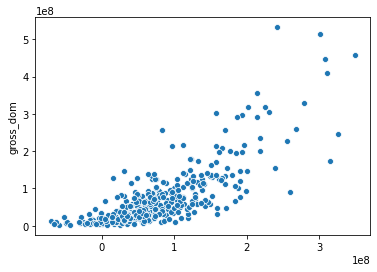

In [70]:
sns.scatterplot(y_preds, y_test)

In [304]:
genres =['Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Sport', 'Thriller', 'War', 'Western']

# Try Polynomial Fit

In [184]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [558]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

"""#Use this if you want to reduce variability in results. 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
"""

degree = 2
est = make_pipeline(PolynomialFeatures(degree), LinearRegression())

est.fit(X_train, y_train)

est.score(X_train, y_train)

0.9597108028907827

In [559]:
est.score(X_test, y_test)

0.38465450562070214

In [560]:
y_preds = est.predict(X_test)

In [561]:
# RMSE is higher but r^2 is closer to 1
MAE = metrics.mean_absolute_error(y_test, y_preds)
MSE = metrics.mean_squared_error(y_test, y_preds)
RMSE = MSE**.5
print('MAE = %.3f' % MAE)
print('MSE = %.3f' % MSE)
print('RMSE = %.3f' % RMSE)

MAE = 29467091.293
MSE = 3122292602651372.500
RMSE = 55877478.492


# Try with Stats Models

In [94]:
movie_df.head()

,link_stub,release,theaters,budget,runtime,gross_dom,holiday_distance,Director_portfolio,distr_portfolio,Composer_portfolio,...,Romance,Sci-Fi,Sport,Thriller,War,Western,mpaa_G,mpaa_PG,mpaa_PG-13,mpaa_R
title,,,,,,,,,,,,,,,,,,,,,
Sin City,/release/rl3027338753/?ref_=bo_yld_table_32,2005-04-01,3230,40000000,124.0,74103820,39,1,13,1,...,0,0,0,1,0,0,0,0,0,1
The Powerpuff Girls Movie,/release/rl1164674561/?ref_=bo_yld_table_150,2002-07-03,2340,11000000,73.0,11412414,1,1,292,7,...,0,1,0,0,0,0,0,1,0,0
Fly Me to the Moon 3D,/release/rl391284225/?ref_=bo_yld_table_143,2008-08-15,713,25000000,84.0,13816982,17,1,19,13,...,0,0,0,0,0,0,1,0,0,0
Heist,/release/rl3327559169/?ref_=bo_yld_table_96,2001-11-09,1891,39000000,109.0,23510841,2,2,292,50,...,0,0,0,1,0,0,0,0,0,1
Pan,/release/rl3177809409/?ref_=bo_yld_table_74,2015-10-09,3515,150000000,111.0,35088320,3,2,292,50,...,0,0,0,0,0,0,0,1,0,0


In [316]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [572]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
model = sm.OLS(y_train, X_train)

fit = model.fit()

fit.summary()

/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1698: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1620: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1446: RuntimeWarning: invalid value encountered in multiply
  cov_p = self.normalized_cov_params * scale
/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              gross_dom   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 06 Oct 2020   Prob (F-statistic):                nan
Time:                        17:50:09   Log-Likelihood:                -7926.8
No. Observations:                1936   AIC:                         1.973e+04
Df Residuals:                       0   BIC:                         3.051e+04
Df Model:                        1935                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
theaters                      -1.015e+07        inf         -0        nan         nan         nan
budget                         -117.7481        inf         -0        nan         nan         nan
holiday_distance               1.078e+06        inf          0        nan         nan         nan
year                          -1.601e+05        inf         -0        nan         nan         nan
budget_Director                -117.9169        inf         -0        nan         nan         nan
gross_dom_Director                0.2939        inf          0        nan         nan         nan
budget_distr                   -117.3193        inf         -0        nan         nan         nan
gross_dom_distr                  -0.1678        inf         -0        nan         nan         nan
budget_Composer                -116.6408        inf         -0        nan         nan         nan
gross_dom_Composer               -0.9739        inf         -0        nan         nan         nan
budget_Cinematographer         -117.9516        inf         -0        nan         nan         nan
gross_dom_Cinematographer         0.6471        inf          0        nan         nan         nan
budget_Editor                  -117.8810        inf         -0        nan         nan         nan
gross_dom_Editor                  0.3682        inf          0        nan         nan         nan
budget_Production Designer     -116.0725        inf         -0        nan         nan         nan
gross_dom_Production Designer    -0.2109        inf         -0        nan         nan         nan
budget_Writer                  -117.9936        inf         -0        nan         nan         nan
gross_dom_Writer                  0.4666        inf          0        nan         nan         nan
budget_Producer                -117.9618        inf         -0        nan         nan         nan
gross_dom_Producer                0.5272        inf          0        nan         nan         nan
budget_Actors                  -117.7567        inf         -0        nan         nan         nan
gross_dom_Actors                  0.4438        inf          0        nan         nan         nan
average_row_budget             1175.7143        inf          0        nan         nan         nan
day_of_year                    4.154e+04        inf          0        nan         nan         nan
theaters_exp                   1.214e+07        inf          0        nan         nan         nan
Action                        -1.865e+07        inf         -0        nan         nan         nan
Adventure                     -7.985e+06        inf         -0        nan         nan         nan
Animation                     -6.758e+07        inf         -0        nan         nan         nan
Biography                      2.845e+07     

Try Ridge

In [318]:
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.pipeline import Pipeline

In [519]:
scaler = StandardScaler()
X_tr = scaler.fit_transform(X_train.values)
X_te = scaler.transform(X_test.values)

In [312]:
#try with RidgeCV

In [428]:
alphavec = 10**np.linspace(-2,2,200)

ridge_model = RidgeCV(alphas = alphavec, cv=kf)
ridge_model.fit(X_tr, y_train);

In [429]:
ridge_model.alpha_

0.01

In [430]:
ridge_model.score(X_tr, y_train)

0.8705123106817204

In [193]:
from sklearn.linear_model import Lasso, LassoCV

In [541]:
alphavec = 10**np.linspace(-2,2,200)

lasso_model = LassoCV(alphas = alphavec, cv=kf)
lasso_model.fit(X_tr, y_train);

/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.106594857798697e+17, tolerance: 1266121160588905.5
  model = cd_fast.enet_coordinate_descent_gram(
/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.10657560388609e+17, tolerance: 1266121160588905.5
  model = cd_fast.enet_coordinate_descent_gram(
/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.1065579354832614e+17, tolerance: 1266121160588905.5
  model = cd_fast.enet_coordinate_descent_gram(
/Users/andrew/opt/anaconda3/lib/python3.

/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.0823738512562304e+17, tolerance: 1266121160588905.5
  model = cd_fast.enet_coordinate_descent_gram(
/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.0823723036688435e+17, tolerance: 1266121160588905.5
  model = cd_fast.enet_coordinate_descent_gram(
/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.0823706741947674e+17, tolerance: 1266121160588905.5
  model = cd_fast.enet_coordinate_descent_gram(
/Users/andrew/opt/anaconda3/lib/pytho

/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.082341954758167e+17, tolerance: 1266121160588905.5
  model = cd_fast.enet_coordinate_descent_gram(
/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.0823425886591974e+17, tolerance: 1266121160588905.5
  model = cd_fast.enet_coordinate_descent_gram(
/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.082342248381235e+17, tolerance: 1266121160588905.5
  model = cd_fast.enet_coordinate_descent_gram(
/Users/andrew/opt/anaconda3/lib/python3

/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.082324263872503e+17, tolerance: 1266121160588905.5
  model = cd_fast.enet_coordinate_descent_gram(
/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.082338698241348e+17, tolerance: 1266121160588905.5
  model = cd_fast.enet_coordinate_descent_gram(
/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.082351016703172e+17, tolerance: 1266121160588905.5
  model = cd_fast.enet_coordinate_descent_gram(
/Users/andrew/opt/anaconda3/lib/python3.

/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.5679672490330995e+17, tolerance: 1279602730371597.2
  model = cd_fast.enet_coordinate_descent_gram(
/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.567955799679594e+17, tolerance: 1279602730371597.2
  model = cd_fast.enet_coordinate_descent_gram(
/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.567944915786332e+17, tolerance: 1279602730371597.2
  model = cd_fast.enet_coordinate_descent_gram(
/Users/andrew/opt/anaconda3/lib/python3

/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.567742660957066e+17, tolerance: 1279602730371597.2
  model = cd_fast.enet_coordinate_descent_gram(
/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.567741651420845e+17, tolerance: 1279602730371597.2
  model = cd_fast.enet_coordinate_descent_gram(
/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.567740737926463e+17, tolerance: 1279602730371597.2
  model = cd_fast.enet_coordinate_descent_gram(
/Users/andrew/opt/anaconda3/lib/python3.

/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.567723042231355e+17, tolerance: 1279602730371597.2
  model = cd_fast.enet_coordinate_descent_gram(
/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.567722914349212e+17, tolerance: 1279602730371597.2
  model = cd_fast.enet_coordinate_descent_gram(
/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.567726304315725e+17, tolerance: 1279602730371597.2
  model = cd_fast.enet_coordinate_descent_gram(
/Users/andrew/opt/anaconda3/lib/python3.

/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.567704950884919e+17, tolerance: 1279602730371597.2
  model = cd_fast.enet_coordinate_descent_gram(
/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.5676862567092314e+17, tolerance: 1279602730371597.2
  model = cd_fast.enet_coordinate_descent_gram(
/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.5677128185538714e+17, tolerance: 1279602730371597.2
  model = cd_fast.enet_coordinate_descent_gram(
/Users/andrew/opt/anaconda3/lib/python

/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.5335241900490138e+17, tolerance: 1081676376539496.2
  model = cd_fast.enet_coordinate_descent_gram(
/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.533518923712187e+17, tolerance: 1081676376539496.2
  model = cd_fast.enet_coordinate_descent_gram(
/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.5335138607680806e+17, tolerance: 1081676376539496.2
  model = cd_fast.enet_coordinate_descent_gram(
/Users/andrew/opt/anaconda3/lib/python

/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.9201874876421504e+17, tolerance: 1081676376539496.2
  model = cd_fast.enet_coordinate_descent_gram(
/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.9201867863218765e+17, tolerance: 1081676376539496.2
  model = cd_fast.enet_coordinate_descent_gram(
/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.920186314607708e+17, tolerance: 1081676376539496.2
  model = cd_fast.enet_coordinate_descent_gram(
/Users/andrew/opt/anaconda3/lib/python

/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.9201762655799117e+17, tolerance: 1081676376539496.2
  model = cd_fast.enet_coordinate_descent_gram(
/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.9201737751878707e+17, tolerance: 1081676376539496.2
  model = cd_fast.enet_coordinate_descent_gram(
/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.9201795724026573e+17, tolerance: 1081676376539496.2
  model = cd_fast.enet_coordinate_descent_gram(
/Users/andrew/opt/anaconda3/lib/pytho

/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.9202274779625984e+17, tolerance: 1081676376539496.2
  model = cd_fast.enet_coordinate_descent_gram(
/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.9201607014018688e+17, tolerance: 1081676376539496.2
  model = cd_fast.enet_coordinate_descent_gram(
/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.920126889219369e+17, tolerance: 1081676376539496.2
  model = cd_fast.enet_coordinate_descent_gram(
/Users/andrew/opt/anaconda3/lib/python

/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.2951867134102656e+17, tolerance: 1294165632949327.0
  model = cd_fast.enet_coordinate_descent_gram(
/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.295183432142364e+17, tolerance: 1294165632949327.0
  model = cd_fast.enet_coordinate_descent_gram(
/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.295180201707945e+17, tolerance: 1294165632949327.0
  model = cd_fast.enet_coordinate_descent_gram(
/Users/andrew/opt/anaconda3/lib/python3

/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.2951208198430554e+17, tolerance: 1294165632949327.0
  model = cd_fast.enet_coordinate_descent_gram(
/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.295119058129088e+17, tolerance: 1294165632949327.0
  model = cd_fast.enet_coordinate_descent_gram(
/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.295122639539794e+17, tolerance: 1294165632949327.0
  model = cd_fast.enet_coordinate_descent_gram(
/Users/andrew/opt/anaconda3/lib/python3

/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.295129287739451e+17, tolerance: 1294165632949327.0
  model = cd_fast.enet_coordinate_descent_gram(
/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.295117742826876e+17, tolerance: 1294165632949327.0
  model = cd_fast.enet_coordinate_descent_gram(
/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.2951281962680474e+17, tolerance: 1294165632949327.0
  model = cd_fast.enet_coordinate_descent_gram(
/Users/andrew/opt/anaconda3/lib/python3

/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.2949757127003827e+17, tolerance: 1294165632949327.0
  model = cd_fast.enet_coordinate_descent_gram(
/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.2952269177629056e+17, tolerance: 1294165632949327.0
  model = cd_fast.enet_coordinate_descent_gram(
/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.2948726255548595e+17, tolerance: 1294165632949327.0
  model = cd_fast.enet_coordinate_descent_gram(
/Users/andrew/opt/anaconda3/lib/pytho

/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.4801948818019635e+17, tolerance: 1247173837488863.8
  model = cd_fast.enet_coordinate_descent_gram(
/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.480191116049933e+17, tolerance: 1247173837488863.8
  model = cd_fast.enet_coordinate_descent_gram(
/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.48018756391153e+17, tolerance: 1247173837488863.8
  model = cd_fast.enet_coordinate_descent_gram(
/Users/andrew/opt/anaconda3/lib/python3.

/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.4801204544120986e+17, tolerance: 1247173837488863.8
  model = cd_fast.enet_coordinate_descent_gram(
/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.480119813816901e+17, tolerance: 1247173837488863.8
  model = cd_fast.enet_coordinate_descent_gram(
/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.480119375709655e+17, tolerance: 1247173837488863.8
  model = cd_fast.enet_coordinate_descent_gram(
/Users/andrew/opt/anaconda3/lib/python3

/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.480117552391781e+17, tolerance: 1247173837488863.8
  model = cd_fast.enet_coordinate_descent_gram(
/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.480111635917642e+17, tolerance: 1247173837488863.8
  model = cd_fast.enet_coordinate_descent_gram(
/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.4801152719955866e+17, tolerance: 1247173837488863.8
  model = cd_fast.enet_coordinate_descent_gram(
/Users/andrew/opt/anaconda3/lib/python3

/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.480130866503533e+17, tolerance: 1247173837488863.8
  model = cd_fast.enet_coordinate_descent_gram(
/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.4801832227905754e+17, tolerance: 1247173837488863.8
  model = cd_fast.enet_coordinate_descent_gram(
/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.480041691735928e+17, tolerance: 1247173837488863.8
  model = cd_fast.enet_coordinate_descent_gram(
/Users/andrew/opt/anaconda3/lib/python3

In [542]:
lasso_model.score(X_tr, y_train)

0.8627379360249875

In [543]:
lasso_model.score(X_te, y_test)

0.8578639253584099

In [545]:
test = pd.DataFrame(zip(X_train.columns, lasso_model.coef_))

In [546]:
test.columns=['X_train', 'coef']

In [547]:
test['abs_coef'] = test.coef.map(np.abs)

In [548]:
test.sort_values(by='abs_coef')

,X_train,coef,abs_coef
47,mpaa_Not Rated,0.000000e+00,0.000000e+00
59,runtime_cat_normal,-6.187333e-10,6.187333e-10
8,gross_dom_Composer,-2.195100e+04,2.195100e+04
34,History,3.706173e+04,3.706173e+04
30,Documentary,5.511609e+04,5.511609e+04
36,Music,1.228417e+05,1.228417e+05
2,holiday_distance,1.339121e+05,1.339121e+05
29,Crime,-1.343371e+05,1.343371e+05
53,seasons_summer,-1.950711e+05,1.950711e+05
57,budget_cat_medium,2.326418e+05,2.326418e+05


In [528]:
test[test.abs_coef==0]['X_train']

47    mpaa_Not Rated
Name: X_train, dtype: object

100.0

In [529]:
y_preds = lasso_model.predict(X_te)

In [530]:
resid = y_preds - y_test

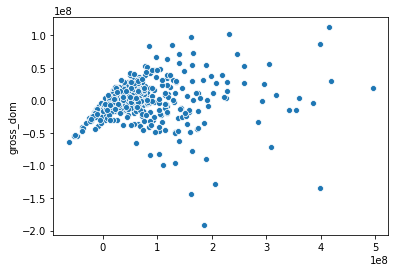

In [531]:
sns.scatterplot(x=y_preds, y=resid)

In [513]:
#### POLY FIT THEN LASSO BUILD PIPELINE
movie_df.gross_dom.mean()

87394849.71224308

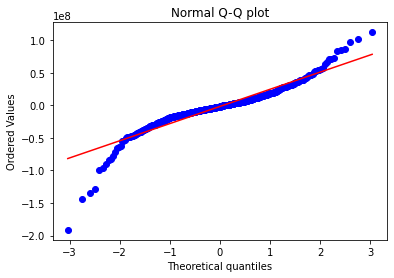

In [532]:
stats.probplot(resid, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [536]:
alphavec = 10**np.linspace(-2,2,200)

"""lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X_tr, y_train);"""

degree = 2
est = make_pipeline(PolynomialFeatures(degree), LassoCV(alphas = alphavec, cv=kf))

est.fit(X_tr, y_train)

est.score(X_tr, y_train)

/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2026306891332266e+17, tolerance: 1266121160588905.5
  model = cd_fast.enet_coordinate_descent(
/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1612164074621411e+17, tolerance: 1266121160588905.5
  model = cd_fast.enet_coordinate_descent(
/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1456363029439651e+17, tolerance: 1266121160588905.5
  model = cd_fast.enet_coordinate_descent(
/Users/andrew/opt/anaconda3/lib/python3.8/site-packa

/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0067015002982642e+17, tolerance: 1266121160588905.5
  model = cd_fast.enet_coordinate_descent(
/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.007120494522462e+17, tolerance: 1266121160588905.5
  model = cd_fast.enet_coordinate_descent(
/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.006501106446664e+17, tolerance: 1266121160588905.5
  model = cd_fast.enet_coordinate_descent(
/Users/andrew/opt/anaconda3/lib/python3.8/site-package

/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.795212284279552e+16, tolerance: 1266121160588905.5
  model = cd_fast.enet_coordinate_descent(
/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.79368408215617e+16, tolerance: 1266121160588905.5
  model = cd_fast.enet_coordinate_descent(
/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.834667658616552e+16, tolerance: 1266121160588905.5
  model = cd_fast.enet_coordinate_descent(
/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/

/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0515977941152293e+17, tolerance: 1266121160588905.5
  model = cd_fast.enet_coordinate_descent(
/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0552391940791446e+17, tolerance: 1266121160588905.5
  model = cd_fast.enet_coordinate_descent(
/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0587162121303374e+17, tolerance: 1266121160588905.5
  model = cd_fast.enet_coordinate_descent(
/Users/andrew/opt/anaconda3/lib/python3.8/site-packa

/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1081220930857726e+17, tolerance: 1266121160588905.5
  model = cd_fast.enet_coordinate_descent(
/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1092191484435091e+17, tolerance: 1266121160588905.5
  model = cd_fast.enet_coordinate_descent(
/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1102674308636189e+17, tolerance: 1266121160588905.5
  model = cd_fast.enet_coordinate_descent(
/Users/andrew/opt/anaconda3/lib/python3.8/site-packa

/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1251166103103294e+17, tolerance: 1266121160588905.5
  model = cd_fast.enet_coordinate_descent(
/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1254541501909064e+17, tolerance: 1266121160588905.5
  model = cd_fast.enet_coordinate_descent(
/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1257771024726102e+17, tolerance: 1266121160588905.5
  model = cd_fast.enet_coordinate_descent(
/Users/andrew/opt/anaconda3/lib/python3.8/site-packa

/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1304345478099958e+17, tolerance: 1266121160588905.5
  model = cd_fast.enet_coordinate_descent(
/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1305402364972104e+17, tolerance: 1266121160588905.5
  model = cd_fast.enet_coordinate_descent(
/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1306412623870336e+17, tolerance: 1266121160588905.5
  model = cd_fast.enet_coordinate_descent(
/Users/andrew/opt/anaconda3/lib/python3.8/site-packa

/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1320885140681392e+17, tolerance: 1266121160588905.5
  model = cd_fast.enet_coordinate_descent(
/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1321211331200568e+17, tolerance: 1266121160588905.5
  model = cd_fast.enet_coordinate_descent(
/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1321523053798867e+17, tolerance: 1266121160588905.5
  model = cd_fast.enet_coordinate_descent(
/Users/andrew/opt/anaconda3/lib/python3.8/site-packa

/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1494396016401259e+17, tolerance: 1279602730371597.2
  model = cd_fast.enet_coordinate_descent(
/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.144628895431112e+17, tolerance: 1279602730371597.2
  model = cd_fast.enet_coordinate_descent(
/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1382935554413491e+17, tolerance: 1279602730371597.2
  model = cd_fast.enet_coordinate_descent(
/Users/andrew/opt/anaconda3/lib/python3.8/site-packag

/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0793020520345936e+17, tolerance: 1279602730371597.2
  model = cd_fast.enet_coordinate_descent(
/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0837416253565864e+17, tolerance: 1279602730371597.2
  model = cd_fast.enet_coordinate_descent(
/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0878827735724248e+17, tolerance: 1279602730371597.2
  model = cd_fast.enet_coordinate_descent(
/Users/andrew/opt/anaconda3/lib/python3.8/site-packa

/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.148537687322652e+17, tolerance: 1279602730371597.2
  model = cd_fast.enet_coordinate_descent(
/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.149915010756393e+17, tolerance: 1279602730371597.2
  model = cd_fast.enet_coordinate_descent(
/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1512330389165562e+17, tolerance: 1279602730371597.2
  model = cd_fast.enet_coordinate_descent(
/Users/andrew/opt/anaconda3/lib/python3.8/site-package

KeyboardInterrupt: 

In [535]:
kf

KFold(n_splits=5, random_state=42, shuffle=True)